<b>Exploratory Data Analysis</b>

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#scipy helper functions
from scipy import stats

In [2]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

#matplotlib.rcParams['font.size'] = 16
#matplotlib.rcParams['figure.figsize'] = (9, 9)

In [3]:

df = pd.read_csv('Dataset_Grade_Prediction/student-mat.csv',sep =';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
#We may filter out all grades that have values of 0 or 1 later
#df[df['G3'].isin([0,1])]
df = df[~df['G3'].isin([0, 1])]


In [5]:
df.shape

(357, 33)

In [6]:
df.columns

Index([u'school', u'sex', u'age', u'address', u'famsize', u'Pstatus', u'Medu',
       u'Fedu', u'Mjob', u'Fjob', u'reason', u'guardian', u'traveltime',
       u'studytime', u'failures', u'schoolsup', u'famsup', u'paid',
       u'activities', u'nursery', u'higher', u'internet', u'romantic',
       u'famrel', u'freetime', u'goout', u'Dalc', u'Walc', u'health',
       u'absences', u'G1', u'G2', u'G3'],
      dtype='object')

Text(0.5,1,'Distribution of Final Grades')

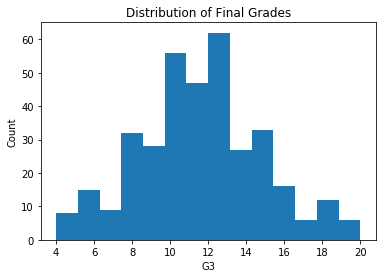

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# Histogram of grades
plt.hist(df['G3'], bins = 14)
plt.xlabel('G3')
plt.ylabel('Count')
plt.title('Distribution of Final Grades')

In [8]:
df['G3'].describe()

count    357.000000
mean      11.523810
std        3.227797
min        4.000000
25%        9.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [9]:
df['G3'].value_counts()

10    56
11    47
15    33
8     32
12    31
13    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: G3, dtype: int64

BarPlot

Show point estimates and confidence intervals as rectangular bars.

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. Bar plots include 0 in the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, and you want to make comparisons against it.

C:\Users\DELL  PC\Anaconda3\envs\py27\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


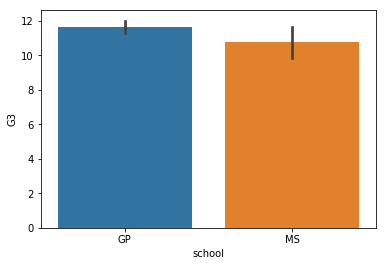

In [10]:
# Doesnt make any sense
sns.barplot(x = 'school', y = 'G3' , data = df)

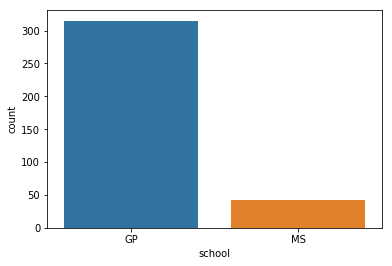

In [11]:
#CountPlot Show the counts of observations in each categorical bin using bars.
sns.countplot(x = 'school' , data = df)
#df[df['G3'] == 0]
#sns.countplot(x = 'Workd_Alc' , data = df)

In [12]:
df = df.rename(columns={'higher': 'higher_edu', 'Medu': 'Mother_edu', 'Fedu': 'Father_edu','Dalc': 'Workd_Alc'})

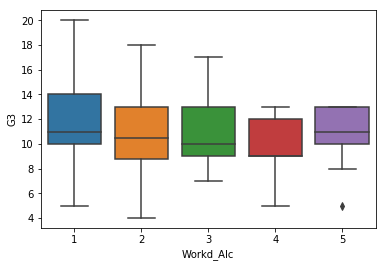

In [13]:
#CountPlot Show the counts of observations in each categorical bin using bars.
sns.boxplot(x = 'Workd_Alc', y='G3' , data = df)

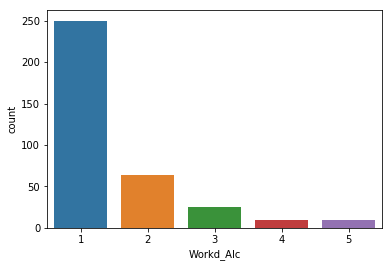

In [14]:
sns.countplot(x = 'Workd_Alc' , data = df)

In [15]:
df['Workd_Alc'].value_counts()

1    250
2     64
3     25
5      9
4      9
Name: Workd_Alc, dtype: int64

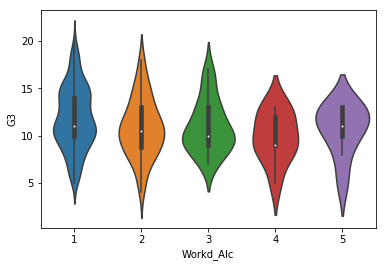

In [16]:
#CountPlot Show the counts of observations in each categorical bin using bars.
sns.violinplot(x = 'Workd_Alc', y='G3' , data = df)

In [17]:
df[df['G3'] < 0]

,school,sex,age,address,famsize,Pstatus,Mother_edu,Father_edu,Mjob,Fjob,...,famrel,freetime,goout,Workd_Alc,Walc,health,absences,G1,G2,G3


In [18]:
df[df['G3'] == 0]['G3']

Series([], Name: G3, dtype: int64)

C:\Users\DELL  PC\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL  PC\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


Text(0.5,1,'Density Plot of Final Grades by Location')

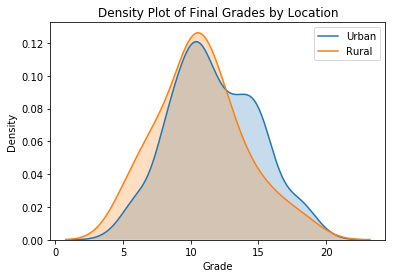

In [19]:
import seaborn as sns
# Make one plot for each different location
sns.kdeplot(df.ix[df['address'] == 'U', 'G3'], 
            label = 'Urban', shade = True)
sns.kdeplot(df.ix[df['address'] == 'R', 'G3'], 
            label = 'Rural', shade = True)
# Add labeling
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Density Plot of Final Grades by Location')

In [20]:
df['guardian'].unique()

array(['mother', 'father', 'other'], dtype=object)

C:\Users\DELL  PC\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL  PC\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\DELL  PC\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-de

Text(0.5,1,'Density Plot of Final Grades by Location')

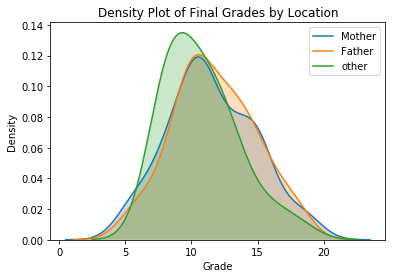

In [21]:
import seaborn as sns
# Make one plot for each different location
sns.kdeplot(df.ix[df['guardian'] == 'mother', 'G3'], 
            label = 'Mother', shade = True)
sns.kdeplot(df.ix[df['guardian'] == 'father', 'G3'], 
            label = 'Father', shade = True)
sns.kdeplot(df.ix[df['guardian'] == 'other', 'G3'], 
            label = 'other', shade = True)
# Add labeling
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Density Plot of Final Grades by Location')

C:\Users\DELL  PC\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL  PC\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


Text(0.5,1,'Density Plot of Final Grades by School')

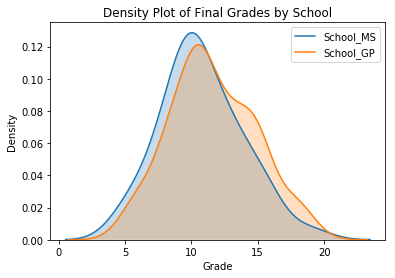

In [22]:
import seaborn as sns
# Make one plot for each different location
sns.kdeplot(df.ix[df['school'] == 'MS', 'G3'], 
            label = 'School_MS', shade = True)
sns.kdeplot(df.ix[df['school'] == 'GP', 'G3'], 
            label = 'School_GP', shade = True)
#sns.kdeplot(df.ix[df['guardian'] == 'other', 'G3'], 
#            label = 'other', shade = True)
# Add labeling
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Density Plot of Final Grades by School')

<b>Feature Selection</b>

In [23]:
df.corr()['G3'].sort_values()

failures     -0.293831
absences     -0.213129
Walc         -0.190054
goout        -0.177383
Workd_Alc    -0.140690
age          -0.140372
traveltime   -0.099785
health       -0.081691
freetime     -0.021589
famrel        0.037711
studytime     0.126728
Father_edu    0.158811
Mother_edu    0.190308
G1            0.891805
G2            0.965583
G3            1.000000
Name: G3, dtype: float64

In [24]:
# Select only categorical variables
category_df = df.select_dtypes('object')
# One hot encode the variables
dummy_df = pd.get_dummies(category_df)
# Put the grade back in the dataframe
dummy_df['G3'] = df['G3']
# Find correlations with grade
dummy_df.corr()['G3'].sort_values()

schoolsup_yes       -0.238365
Mjob_other          -0.142541
address_R           -0.130090
higher_edu_no       -0.113419
internet_no         -0.111624
sex_F               -0.102448
Mjob_at_home        -0.090624
school_MS           -0.083615
Fjob_other          -0.081502
guardian_other      -0.069491
famsup_yes          -0.067305
activities_no       -0.058600
reason_course       -0.050918
romantic_yes        -0.049944
famsize_GT3         -0.039744
paid_yes            -0.028899
Pstatus_T           -0.026665
nursery_no          -0.026541
Fjob_services       -0.018154
reason_other        -0.003897
reason_home          0.000372
Fjob_health          0.006241
guardian_mother      0.007728
nursery_yes          0.026541
Pstatus_A            0.026665
paid_no              0.028899
Fjob_at_home         0.028954
guardian_father      0.035220
famsize_LE3          0.039744
Mjob_teacher         0.045390
romantic_no          0.049944
reason_reputation    0.056573
activities_yes       0.058600
famsup_no 

In this problem we will use these results to perform feature selection by retaining only the 6 variables that are most highly correlated with the final grade. 6 is sort of an arbitrary number that I found works well in the model, which shows that a lot of machine learning is just experimentation!

In [25]:
df[['sex','school']].head()

,sex,school
0,F,GP
1,F,GP
2,F,GP
3,F,GP
4,F,GP


In [26]:
type(df[['sex','school']])

pandas.core.frame.DataFrame

In [27]:
type(df['sex'])

pandas.core.series.Series

In [28]:
df.head()

,school,sex,age,address,famsize,Pstatus,Mother_edu,Father_edu,Mjob,Fjob,...,famrel,freetime,goout,Workd_Alc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [29]:
df_feats = df[['higher_edu','Mother_edu','Father_edu','absences','studytime','failures','school','Workd_Alc']]

In [30]:
#Lets remove Workd_Alc since the boxplot shows that Grades are almost similar irrespective of values of Workd_Alc

df_feats = df[['higher_edu','Mother_edu','Father_edu','absences','studytime','failures','school']]

In [31]:
df_feats.head()

,higher_edu,Mother_edu,Father_edu,absences,studytime,failures,school
0,yes,4,4,6,2,0,GP
1,yes,1,1,4,2,0,GP
2,yes,1,1,10,2,3,GP
3,yes,4,2,2,3,0,GP
4,yes,3,3,4,2,0,GP


In [32]:
labels = df['G3']

In [33]:
 x_train, x_test, y_train, y_test = train_test_split(df_feats, labels, 
                                                        test_size = 0.25,
                                                        random_state=42)
    

In [34]:
x_train.count()

higher_edu    267
Mother_edu    267
Father_edu    267
absences      267
studytime     267
failures      267
school        267
dtype: int64

In [35]:
df.isnull().values.any()

False

In [36]:
df[pd.isnull(df).any(axis=1)]


,school,sex,age,address,famsize,Pstatus,Mother_edu,Father_edu,Mjob,Fjob,...,famrel,freetime,goout,Workd_Alc,Walc,health,absences,G1,G2,G3


In [37]:
df[df.isnull().any(axis=1)]

,school,sex,age,address,famsize,Pstatus,Mother_edu,Father_edu,Mjob,Fjob,...,famrel,freetime,goout,Workd_Alc,Walc,health,absences,G1,G2,G3


In [38]:
x_test.count()

higher_edu    90
Mother_edu    90
Father_edu    90
absences      90
studytime     90
failures      90
school        90
dtype: int64

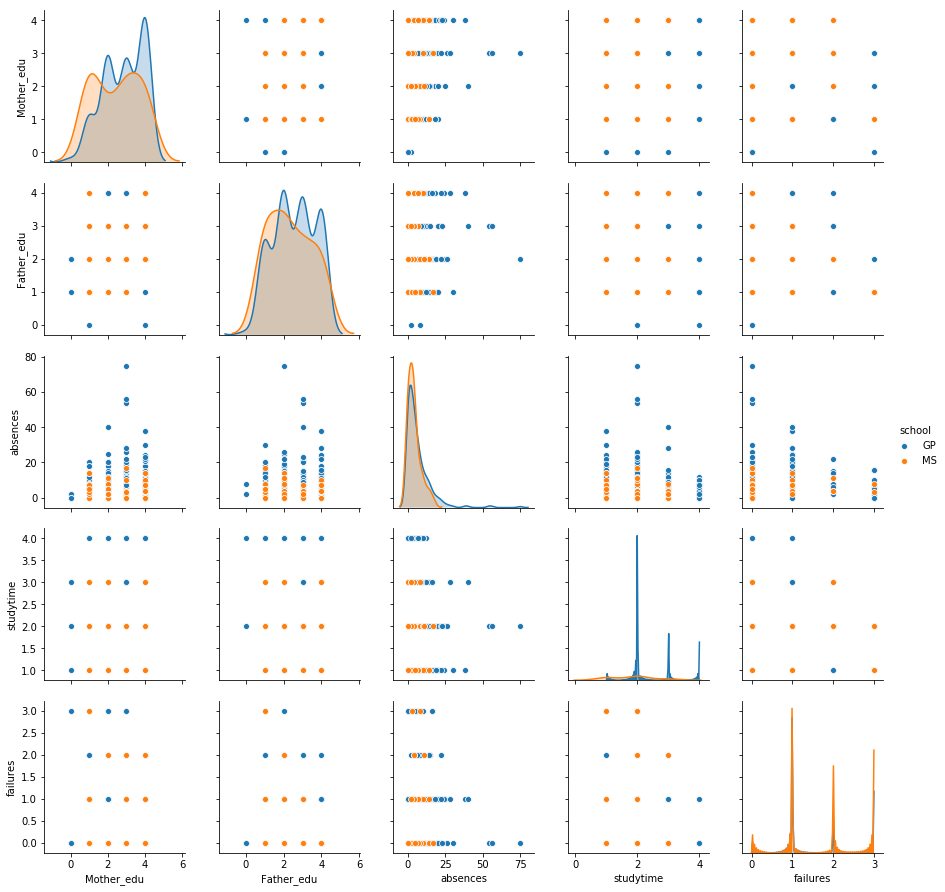

In [39]:
sns.pairplot(df_feats, hue = 'school')

C:\Users\DELL  PC\Anaconda3\envs\py27\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


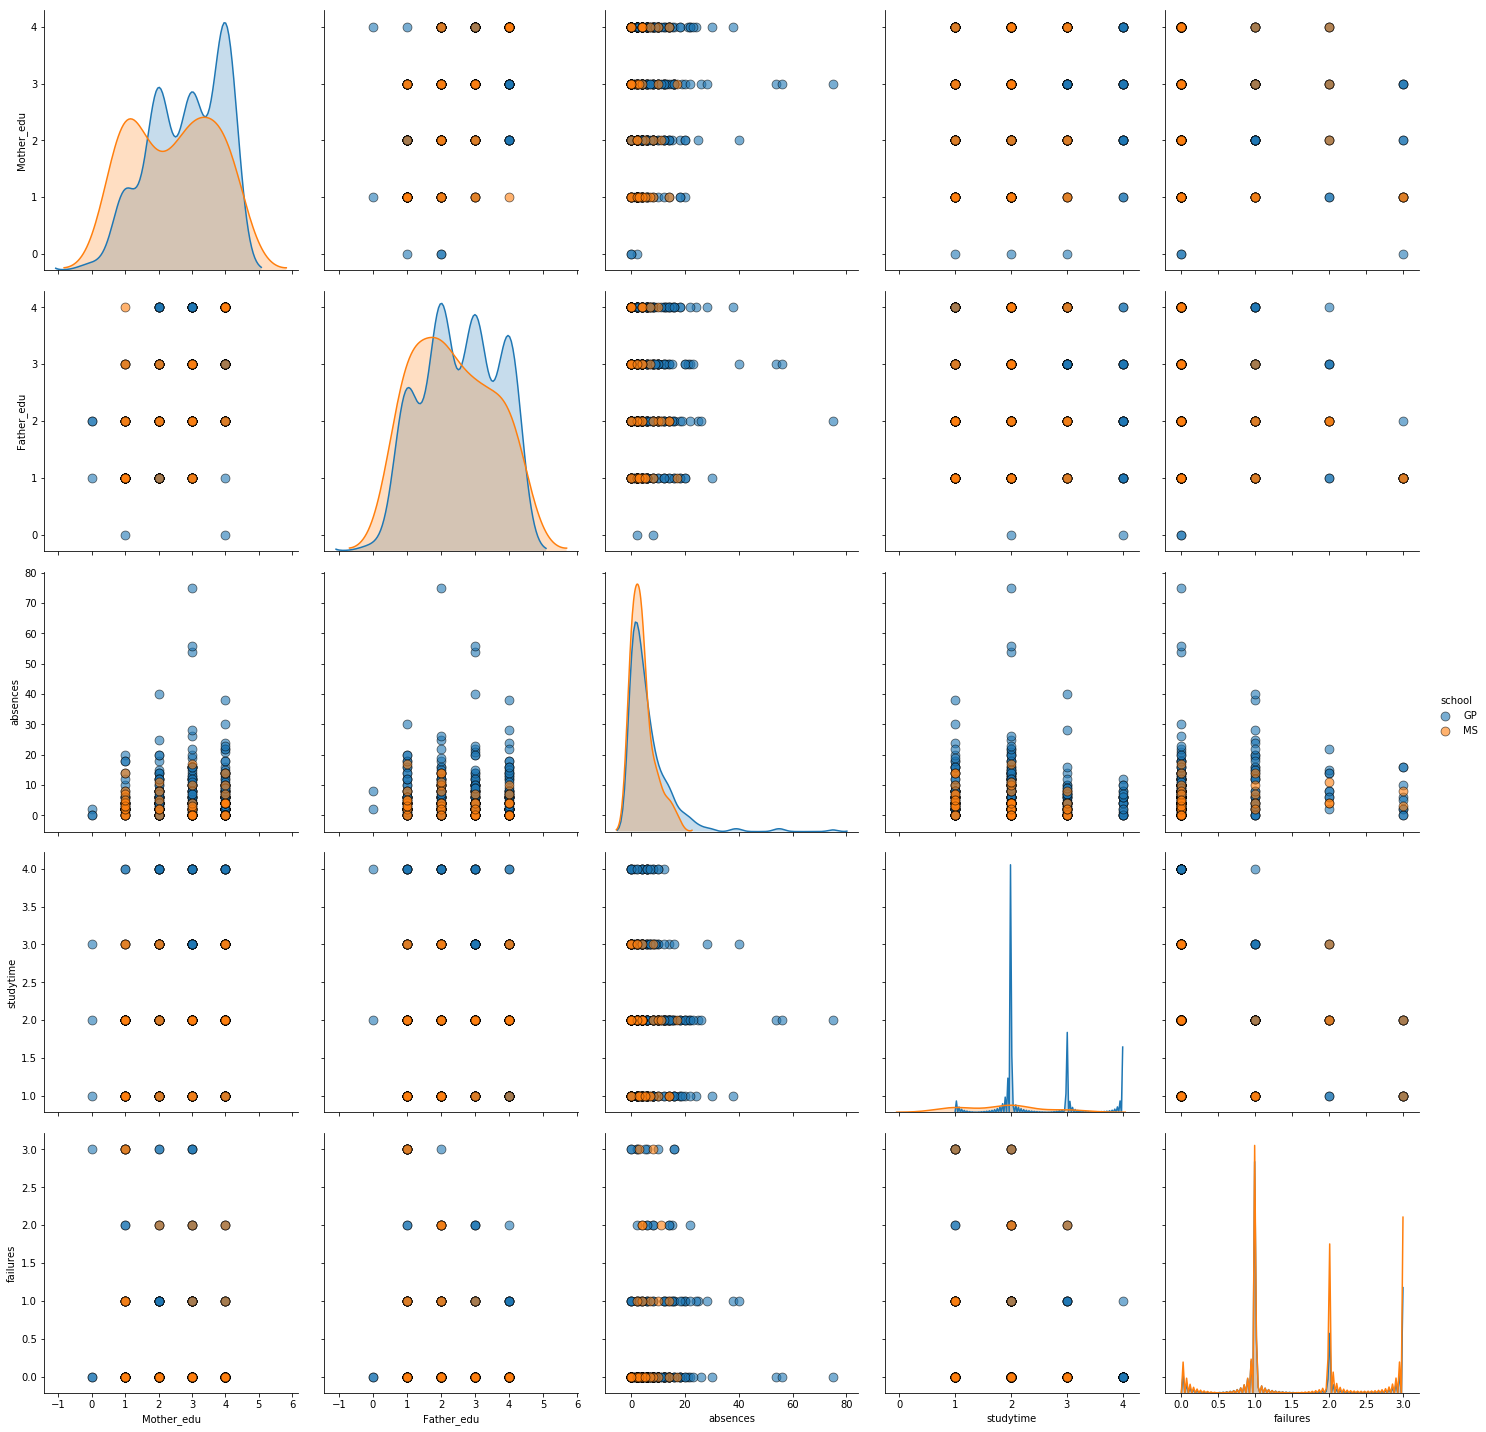

In [40]:
# Create a pair plot colored by continent with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(df_feats, hue = 'school', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

C:\Users\DELL  PC\Anaconda3\envs\py27\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\DELL  PC\Anaconda3\envs\py27\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\DELL  PC\Anaconda3\envs\py27\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:513: RuntimeWarning: invalid value encountered in divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
C:\Users\DELL  PC\Anaconda3\envs\py27\lib\site-packages\matplotlib\contour.py:1540: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\DELL  PC\Anaconda3\envs\py27\lib\site-packages\matplotlib\contour.py:1541: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.

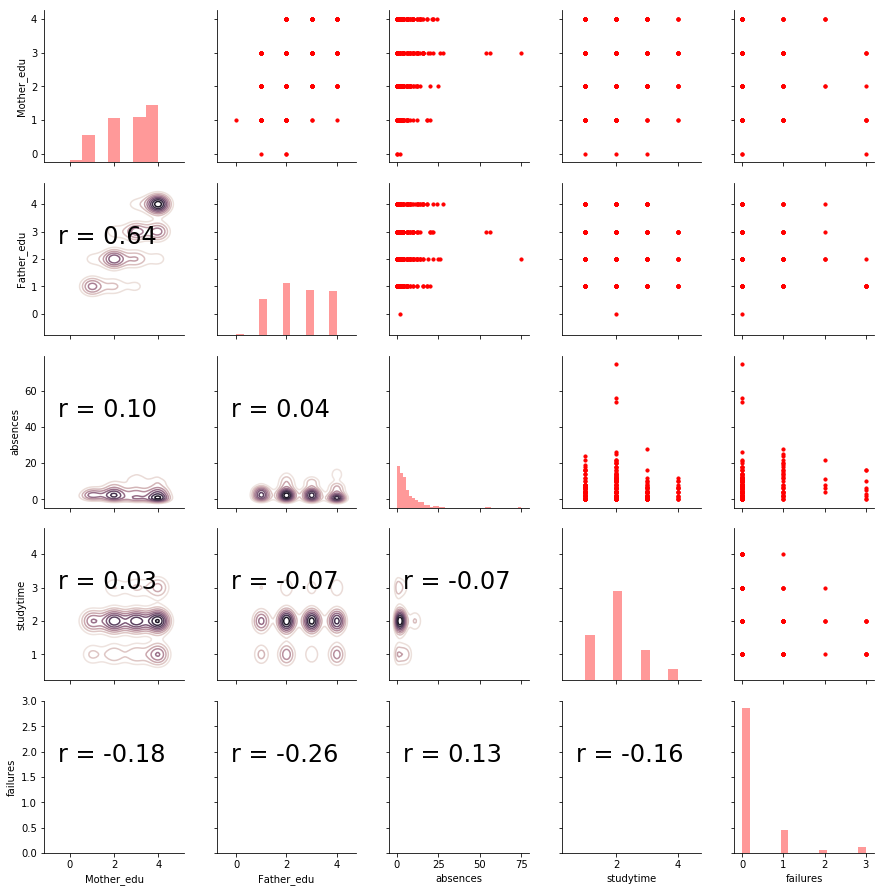

In [41]:
# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(x_train)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [42]:
y_train.head()

60     11
114     9
281    10
110    19
309    10
Name: G3, dtype: int64

In [43]:
# Create relation to the median grade column
x_plot = x_train.copy()
x_plot['Relation_Median'] = y_train > 12
x_plot['Relation_Median'] = x_plot['Relation_Median'].replace({True : 'above', False : 'below'})

In [44]:
x_plot['higher_edu'] = x_plot['higher_edu'].replace({'yes' : 1, 'no' : 0})

In [45]:
x_plot.head()

,higher_edu,Mother_edu,Father_edu,absences,studytime,failures,school,Relation_Median
60,1,4,4,6,2,0,GP,below
114,1,2,1,8,2,0,GP,below
281,1,3,2,19,1,1,GP,below
110,1,4,4,6,1,0,GP,above
309,1,1,1,18,2,1,GP,below


In [46]:
x_plot.columns

Index([u'higher_edu', u'Mother_edu', u'Father_edu', u'absences', u'studytime',
       u'failures', u'school', u'Relation_Median'],
      dtype='object')

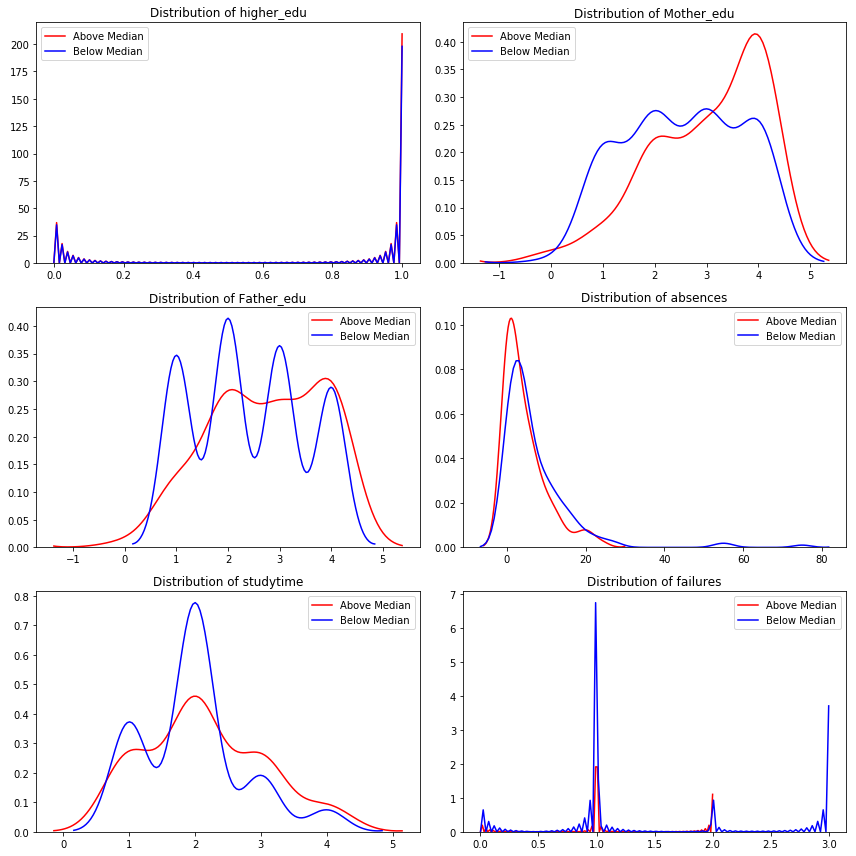

In [47]:
plt.figure(figsize=(12, 12))
count = 1
for i in x_plot.columns:
    #print i
    #print count
    if i == 'school' or i == 'Relation_Median': 
        continue
        #print x_plot[x_plot['Relation_Median']
    else:
        plt.subplot(3,2,count)
        plt.title("Distribution of " + i)
        sns.kdeplot(x_plot[x_plot['Relation_Median'] == 'above'][i], color ='r', label = 'Above Median')
        sns.kdeplot(x_plot[x_plot['Relation_Median'] == 'below'][i], color ='b', label = 'Below Median')
        count = count + 1
plt.tight_layout()  

# Establish Baselines Metrics

In [48]:
y_test.head()

243    12
42     18
319    11
328     9
56     15
Name: G3, dtype: int64

In [49]:
y_train.head()

60     11
114     9
281    10
110    19
309    10
Name: G3, dtype: int64

In [50]:
# Naive baseline is the median
median_pred = y_train.median()
median_pred

11.0

In [51]:
#True grade values are in y_test. Now we need to find RMSE and MAE considering if we use 12.0 as grade for all test values.

In [52]:
baseline_array = np.full((1,len(y_test)), median_pred)

In [53]:
#y_test.shape
y_test = np.array(y_test)
#y_test.reshape

In [54]:
y_test.reshape(1,len(y_test))

array([[12, 18, 11,  9, 15,  9, 14, 15,  9,  8,  6,  5, 12, 11, 13, 11,
        11, 13, 14, 16, 10, 12,  9, 12, 16, 12,  7, 13,  8, 14, 11, 15,
        10, 10, 19, 13, 16, 10, 14,  8, 10, 12, 14, 13,  9, 10, 10, 15,
         6, 13, 18, 13, 13, 10,  7,  6, 15, 14, 10, 14,  9, 11,  9, 11,
         5, 10, 14, 15, 10, 10,  8,  8, 12, 10, 11, 10,  8,  8, 14, 12,
        15,  6, 16, 16,  8, 16, 11, 11, 16, 13]], dtype=int64)

In [55]:
y_test.shape

(90,)

In [56]:
baseline_array.shape

(1, 90)

In [57]:
mae = np.mean(abs(y_test - baseline_array))

In [58]:
rmse = np.sqrt(np.mean((y_test - baseline_array)**2))


In [59]:
print('Median Baseline  MAE: {:.4f}'.format(mae))
print('Median Baseline RMSE: {:.4f}'.format(rmse))

Median Baseline  MAE: 2.5556
Median Baseline RMSE: 3.1482


In [60]:
x_test.head()

,higher_edu,Mother_edu,Father_edu,absences,studytime,failures,school
243,yes,4,4,0,1,0,GP
42,yes,4,4,2,2,0,GP
319,yes,4,4,2,2,0,GP
328,yes,4,4,7,3,0,GP
56,yes,4,3,0,2,0,GP


In [61]:
x_train.head()

,higher_edu,Mother_edu,Father_edu,absences,studytime,failures,school
60,yes,4,4,6,2,0,GP
114,yes,2,1,8,2,0,GP
281,yes,3,2,19,1,1,GP
110,yes,4,4,6,1,0,GP
309,yes,1,1,18,2,1,GP


In [62]:
x_train['higher_edu'] = x_train['higher_edu'].replace({'yes' : 1, 'no' : 0})
x_test['higher_edu'] = x_test['higher_edu'].replace({'yes' : 1, 'no' : 0})

x_train['school'] = x_train['school'].replace({'MS' : 1, 'GP' : 0})
x_test['school'] = x_test['school'].replace({'MS' : 1, 'GP' : 0})



C:\Users\DELL  PC\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELL  PC\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\DELL  PC\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [63]:
x_train.head()

,higher_edu,Mother_edu,Father_edu,absences,studytime,failures,school
60,1,4,4,6,2,0,0
114,1,2,1,8,2,0,0
281,1,3,2,19,1,1,0
110,1,4,4,6,1,0,0
309,1,1,1,18,2,1,0


In [64]:
x_test.head()

,higher_edu,Mother_edu,Father_edu,absences,studytime,failures,school
243,1,4,4,0,1,0,0
42,1,4,4,2,2,0,0
319,1,4,4,2,2,0,0
328,1,4,4,7,3,0,0
56,1,4,3,0,2,0,0


In [65]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(x_train, x_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression','ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    #X_train = X_train.drop(columns='Grade')
    #X_test = X_test.drop(columns='Grade')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.ix[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.ix['Baseline', :] = [baseline_mae, baseline_rmse]
    #print "For Regression Model " + str(model1.score(x_test,y_test)) 
    #print model1.coef_,model1.intercept_
    return results

In [66]:
results = evaluate(x_train, x_test, y_train, y_test)

C:\Users\DELL  PC\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\DELL  PC\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [67]:
results

,mae,rmse
Linear Regression,2.32307,2.81605
ElasticNet Regression,2.48477,2.97986
Random Forest,2.57931,3.26279
Extra Trees,2.95722,3.7734
SVM,2.36177,2.91062
Gradient Boosted,2.35639,2.85632
Baseline,2.55556,3.14819


In [68]:
results.mae

Linear Regression        2.32307
ElasticNet Regression    2.48477
Random Forest            2.57931
Extra Trees              2.95722
SVM                      2.36177
Gradient Boosted         2.35639
Baseline                 2.55556
Name: mae, dtype: object

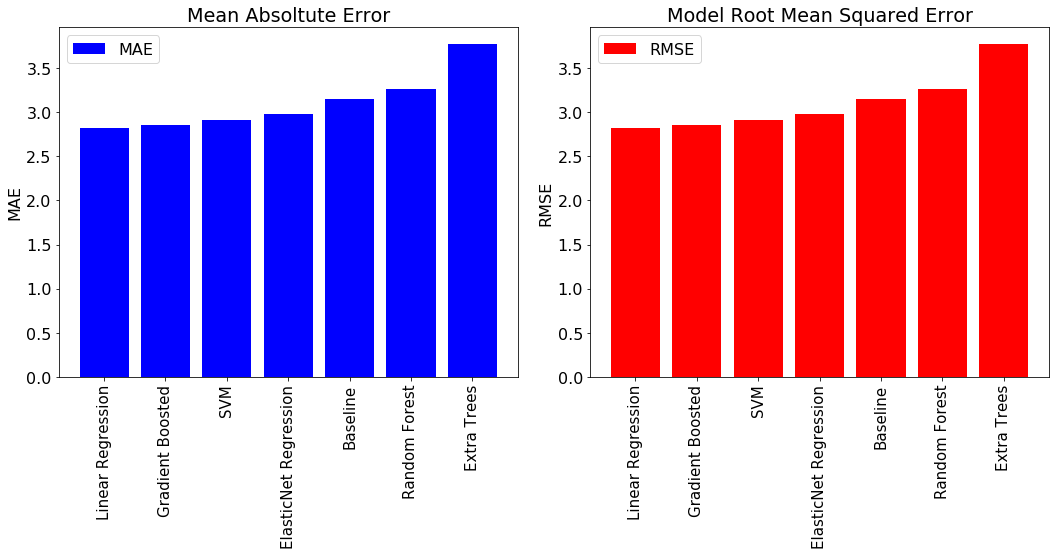

In [69]:
plt.figure(figsize=(15, 8))
plt.rcParams['font.size'] = 16

plt.subplot(1,2,1)
width = 1/1.5

results=results.sort_values('mae')
plt.bar(results.index, results.rmse, color="blue")
plt.title('Mean Absoltute Error'); plt.ylabel('MAE');
plt.xticks(results.index, fontsize=15, rotation=90)
plt.legend(['MAE'])

plt.subplot(1,2,2)
width = 1/1.5
results=results.sort_values('rmse')
plt.bar(results.index, results.rmse, color="red")
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');
plt.xticks(results.index, fontsize=15, rotation=90)
plt.legend(['RMSE'])

plt.tight_layout()

In [70]:
print('The Gradient Boosted regressor is {:0.2f}% better than the baseline.'.format( 
    (100 * abs(results.loc['Gradient Boosted', 'mae'] - results.loc['Baseline', 'mae'])) / results.loc['Baseline', 'mae']))

The Gradient Boosted regressor is 7.79% better than the baseline.


In [71]:
reg = LinearRegression()

reg.fit(x_train, y_train)
predictions = reg.predict(x_test)

score = reg.score(x_test,y_test)
coef = reg.coef_
intercept = reg.intercept_
#print reg.score(feature_test,target_test)

In [72]:
for i in range(len(coef)):
    print "Name of attribute is " + x_test.columns[i] + " and coefficient value is " + str(coef[i])

Name of attribute is higher_edu and coefficient value is -0.21219725412895035
Name of attribute is Mother_edu and coefficient value is 0.3536535208694525
Name of attribute is Father_edu and coefficient value is 0.03999814922242346
Name of attribute is absences and coefficient value is -0.07179646560796454
Name of attribute is studytime and coefficient value is 0.30683693761277203
Name of attribute is failures and coefficient value is -1.1632758345776049
Name of attribute is school and coefficient value is -0.3683193366624127


In [73]:
#print('Median Baseline  MAE: {:.4f}'.format(mae))
#ols_formula = 'Grade = %0.2f +' % lr.intercept_

equation = ''
for i in range(len(coef)):
    equation = equation + str(round(coef[i],3)) + "*" + x_test.columns[i] + " + "
   
    
print "Grade = " + equation + str(round(intercept,3))

Grade = -0.212*higher_edu + 0.354*Mother_edu + 0.04*Father_edu + -0.072*absences + 0.307*studytime + -1.163*failures + -0.368*school + 10.835
